<a href="https://colab.research.google.com/github/EstevaoSB/Python-Pandas/blob/main/An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
# Upload do arquivo

from google.colab import files
arquivo = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [7]:
# Criando o DataFrame

df = pd.read_excel("AdventureWorks.xlsx")

In [8]:
# Exibindo as 5 primeiras linhas

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [9]:
# Exibindo quantidade de linhas e colunas

df.shape

(904, 16)

In [11]:
# Verificando os tipos de dados

df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [12]:
# Total Receita

df["Valor Venda"].sum()

5984606.1426

In [13]:
# Total Custo (Criando a coluna custo)

df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])


In [14]:
df.sample()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
480,2009-02-02,2009-02-08,306,1226,19062,200902024CS737,330.99,999.0,13,909.09,12077.91,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,4302.87


In [15]:
# Qual o custo total?

round(df["Custo"].sum(),2)

2486783.05

In [16]:
# Lucro total ( Criando a coluna lucro )

df["Lucro"] = df["Valor Venda"]- df["Custo"]

In [18]:
df.sample()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
112,2009-04-08,2009-04-12,199,1155,18930,200904084CS839,324.69,980.0,6,0.0,5880.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,3931.86


In [19]:
# Total lucro

round(df["Lucro"].sum(),2)

3497823.09

In [20]:
# Criando a coluna com o total de dias para envio

df["Tempo Envio"] = df["Data Envio"] - df["Data Venda"]

In [21]:
df.sample()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
710,2009-01-30,2009-02-08,307,2496,19115,200901305CS697,5.09,9.99,624,935.064,5298.696,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,3176.16,2122.536,9 days


Agora vamos ver a média do tempo de envio para cada marca, e para isso precisamos transformar a coluna Tempo Envio e numérica


In [22]:
df.dtypes

Data Venda         datetime64[ns]
Data Envio         datetime64[ns]
ID Loja                     int64
ID Produto                  int64
ID Cliente                  int64
No. Venda                  object
Custo Unitário            float64
Preço Unitário            float64
Quantidade                  int64
Valor Desconto            float64
Valor Venda               float64
Produto                    object
Fabricante                 object
Marca                      object
Classe                     object
Cor                        object
Custo                     float64
Lucro                     float64
Tempo Envio       timedelta64[ns]
dtype: object

In [27]:
# Extraindo os dias ( E alterando o tipo da coluna Tempo Envio para int64)

df["Tempo Envio"] =  (df["Data Envio"] - df["Data Venda"]).dt.days

In [29]:
df.sample()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
896,2009-03-04,2009-03-15,307,1155,19117,200903044CS706,324.69,980.0,6,1176.0,4704.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,2755.86,11


In [31]:
# Verificando o tipo da coluna 

df["Tempo Envio"].dtype

dtype('int64')

In [34]:
# Médio de tempo de envio por marca

round(df.groupby("Marca")["Tempo Envio"].mean(), 2)

Marca
Adventure Works    8.66
Contoso            8.47
Fabrikam           8.51
Name: Tempo Envio, dtype: float64

In [36]:
# Verificando se temos dados Faltantes

df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

Lucro por ano e marca

In [49]:
# Agrupando por ano e marca

df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [47]:
pd.options.display.float_format = '{:20,.2f}'.format

In [48]:
# Resetando o Index

lucro_Ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()

lucro_Ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [51]:
# Total de produtos vendidos e ordenando do maior para o menor

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

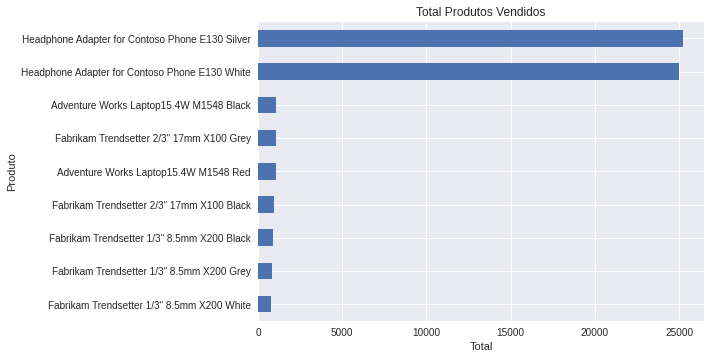

In [52]:
# Gráfico de produtos vendidos

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title = "Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

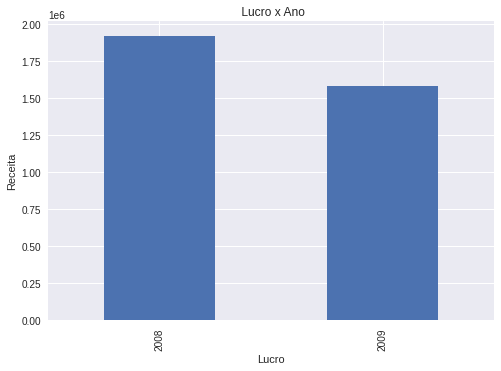

In [54]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title = " Lucro x Ano")
plt.xlabel("Lucro")
plt.ylabel("Receita");

In [56]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [60]:
# Selecionando Vendas de 2009

df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.sample()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
537,2009-01-24,2009-01-29,306,1155,19061,200901244CS736,324.69,980.00,4,784.00,"3,136.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,298.76","1,837.24",5


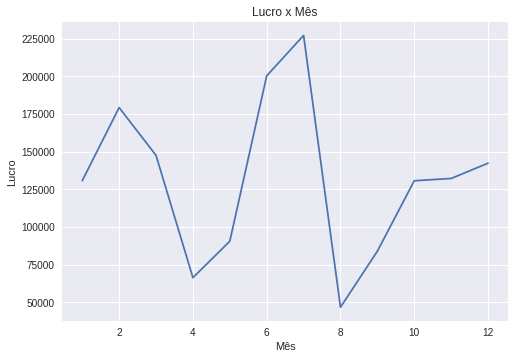

In [64]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title = "Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

Text(0, 0.5, 'Lucro')

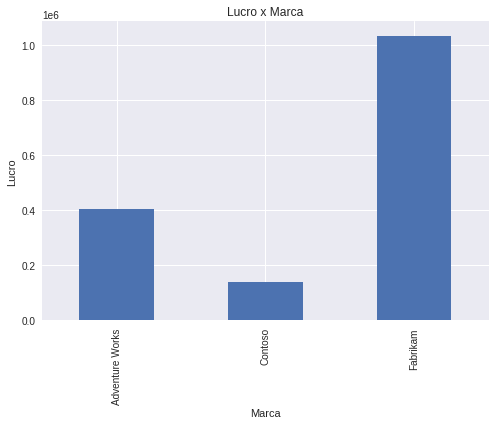

In [69]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title = "Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation = 'horizontal'); # O eixo x na horizontal

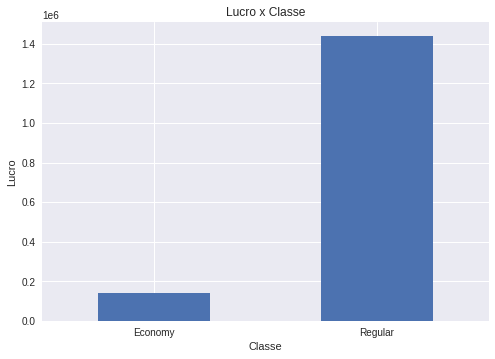

In [70]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title = "Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation = 'horizontal');

In [71]:
# Análise estatística do tempo de envio

df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

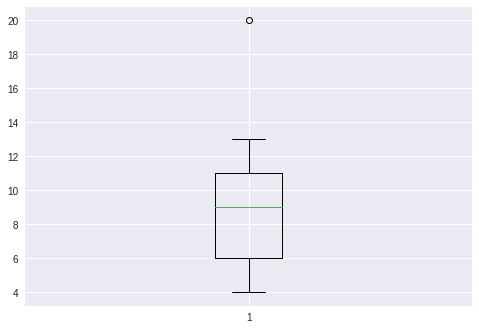

In [72]:
# Grafico de Boxplot

plt.boxplot(df["Tempo Envio"]);

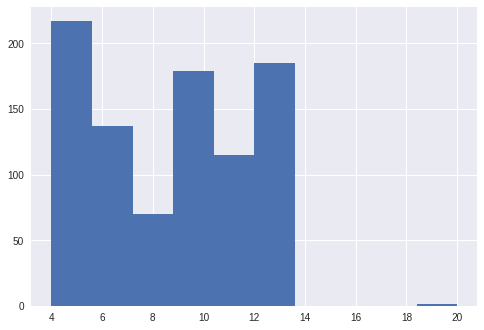

In [74]:
# Histograma

plt.hist(df["Tempo Envio"]);

In [75]:
# Tempo mínimo de envio

df["Tempo Envio"].min()

4

In [76]:
# Tempo Máximo de envio

df["Tempo Envio"].max()

20

In [77]:
# Identificando o outlier ( O indivíduo com maior tempo de envio)

df[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [78]:
# Salvando o arquivo vendas em csv e não carregando o índice junto

df.to_csv("df_vendas.csv", index=False)